## Model Comparison and Evaluation: Random Forest, Decision Tree, Naive Bayes, and SVM

Four models (Decision Tree, Random Forest, SVM, Naive Bayes) were trained using their best hyperparameters and the top 10 features identified. The Random Forest model outperformed the others, achieving the highest metrics and proving to be the most effective for phishing detection.

### Importing Libraries for Model Evaluation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset


In [3]:
df = pd.read_csv("Data/Phishing_URL_Dataset.csv")

The top 10 features selected for phishing detection include URLSimilarityIndex, LineOfCode, NoOfExternalRef, and HasSocialNet, among others. These features were chosen based on their significance in improving model accuracy and performance.

In [4]:
# List of features to be used
selected_features = [
    "URLSimilarityIndex",
    "LineOfCode",
    "NoOfExternalRef",
    "NoOfSelfRef",
    "NoOfCSS",
    "NoOfImage",
    "HasSocialNet",
    "HasCopyrightInfo",
    "HasDescription",
    "NoOfJS"
]

### Defining Features and Target Variables


In [5]:
#Features
X = df[selected_features]
#Target
y = df["label"]

### Splitting Data into Training and Testing Sets


In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Best hyperparameters for each model were identified during individual model training, and detailed information can be found in the respective model training files. The parameters were fine-tuned to achieve optimal performance across all models.

### Random Forest Model training with Best Hyperparameters

In [7]:

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

### Decision Tree Model training with Best Hyperparameters

In [8]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

### SVM Model training with Best Hyperparameters

In [9]:
svm_model = SVC(C=0.1, kernel='linear', gamma='scale') 
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

### Naive Bayes Model training with Best Hyperparameters

In [10]:
nb_model = GaussianNB(var_smoothing = 1e-09)
nb_model.fit(X_train, y_train)

GaussianNB()

The models evaluated include Random Forest, Decision Tree, SVM, and Naive Bayes, each trained and tested to determine the best performing model.

In [11]:
# Evaluate models
models = {
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Naive Bayes": nb_model
}

### Model Evaluation and Comparison

The following code evaluates the performance of four models (Random Forest, Decision Tree, SVM, and Naive Bayes) on test data, calculating accuracy, precision, recall, F1-score, and confusion matrices. The results are then organized into a DataFrame for easy comparison of all models.

In [12]:
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Confusion Matrix": []
}

for model_name, model in models.items():
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Confusion Matrix"].append(cm)
    
# Convert results to a DataFrame for easier comparison
import pandas as pd
results_df = pd.DataFrame(results)

# Print the comparison of all models
print(results_df)


           Model  Accuracy  Precision    Recall  F1-Score  \
0  Random Forest  0.999915   0.999852  1.000000  0.999926   
1  Decision Tree  0.999873   0.999815  0.999963  0.999889   
2            SVM  0.999830   0.999703  1.000000  0.999852   
3    Naive Bayes  0.994678   0.999925  0.990764  0.995323   

             Confusion Matrix  
0    [[20196, 4], [0, 26959]]  
1    [[20195, 5], [1, 26958]]  
2    [[20192, 8], [0, 26959]]  
3  [[20198, 2], [249, 26710]]  


### Visualization of Confusion Matrices for Model Evaluation

Confusion matrices were plotted for all models to visualize prediction performance on legitimate and phishing cases. This helps in understanding classification strengths and areas needing improvement.

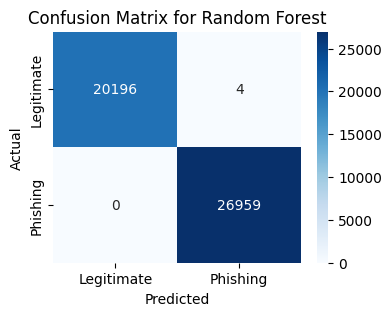

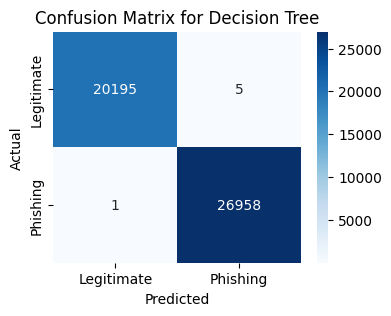

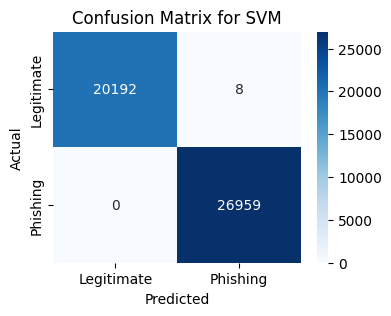

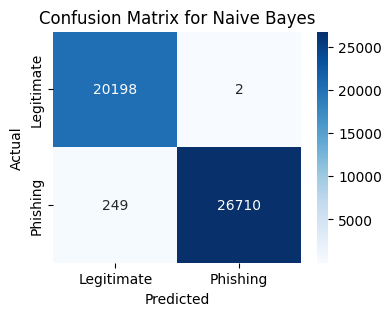

In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    # Predict the target variable on the test set
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix using Seaborn heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage for Random Forest, Decision Tree, SVM, and Naive Bayes
plot_confusion_matrix(rf_model, X_test, y_test, 'Random Forest')
plot_confusion_matrix(dt_model, X_test, y_test, 'Decision Tree')
plot_confusion_matrix(svm_model, X_test, y_test, 'SVM')
plot_confusion_matrix(nb_model, X_test, y_test, 'Naive Bayes')

### Identifying the Best Model Based on Metrics

In [14]:
# Identify the best model based on performance metrics
best_model_accuracy = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"\nBest Model based on Accuracy: {best_model_accuracy}")
best_model_Precision = results_df.loc[results_df['Precision'].idxmax(), 'Model']
print(f"\nBest Model based on Precision: {best_model_Precision}")
best_model_Recall = results_df.loc[results_df['Recall'].idxmax(), 'Model']
print(f"\nBest Model based on Recall: {best_model_Recall}")
best_model_F1 = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
print(f"\nBest Model based on F1-Score: {best_model_F1}")


Best Model based on Accuracy: Random Forest

Best Model based on Precision: Naive Bayes

Best Model based on Recall: Random Forest

Best Model based on F1-Score: Random Forest


### Model Evaluation Conclusion

The Random Forest model demonstrated exceptional performance, achieving the highest accuracy (99.99%), precision, recall, and F1-Score among all models, with no false negatives and only four false positives. Decision Tree and SVM also showed high accuracy but slightly more errors in predictions. Naive Bayes, while efficient, had comparatively lower performance with higher false negatives. Based on the evaluation, Random Forest is the most reliable and effective model for phishing URL detection.

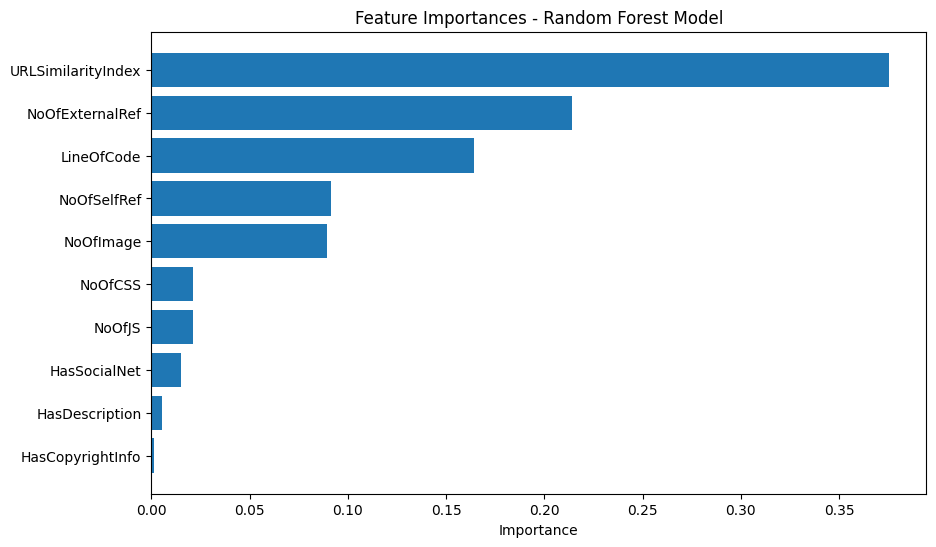

In [25]:

# Extract the feature importances
importances = rf_model.feature_importances_

# Get the feature names (assuming X_train is a pandas DataFrame with column names)
feature_names = X_train.columns

# Sort the features by importance (highest to lowest)
indices = np.argsort(importances)[::-1]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest Model")
plt.barh(range(10), importances[indices[:10]], align="center")
plt.yticks(range(10), [feature_names[i] for i in indices[:10]])
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.show()